In [17]:
# 题目三 、银行客户分群（25分）。
import pandas as pd
import numpy as np
# 利用客户信息.xlsx数据集，选择合适模型，解决银行客户分群问题。
# 1、读取数据并查看前5行以及数据均值、中位数等统计量。（2分）
a1=pd.read_excel("E:///python代码/lx-yk/data-yk/yk1/客户信息.xlsx")
print(a1.head(5))
print("统计信息。\n",a1.describe())
print("数据均值。\n",a1.mean())
print("中位数。\n",a1.median())

   年龄(岁)  收入(万元)
0     50      66
1     44      51
2     30      56
3     46      50
4     32      50
统计信息。
             年龄(岁)      收入(万元)
count  112.000000  112.000000
mean    37.187500   43.625000
std      8.048872   16.220955
min     21.000000   15.000000
25%     30.000000   27.750000
50%     37.500000   48.500000
75%     44.000000   54.250000
max     52.000000   74.000000
数据均值。
 年龄(岁)     37.1875
收入(万元)    43.6250
dtype: float64
中位数。
 年龄(岁)     37.5
收入(万元)    48.5
dtype: float64


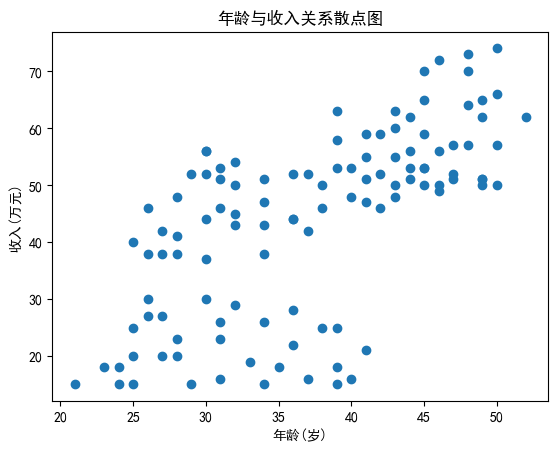

In [16]:

# 2、EDA分析：可视化展示并形成分析结论（5分）
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Simhei']
plt.rcParams['axes.unicode_minus'] = True
plt.scatter(a1["年龄(岁)"],a1["收入(万元)"])
plt.title("年龄与收入关系散点图")
plt.xlabel("年龄(岁)")
plt.ylabel("收入(万元)")
plt.show()
# 结论：随着年纪增长，收入逐渐增多

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

# 3、数据建模：选择合适的模型建模训练，并选用合适的指标评估模型。（8分）
X = a1[['年龄(岁)']]
y = a1['收入(万元)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# kmeans = KMeans(n_clusters=3, random_state=42)
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

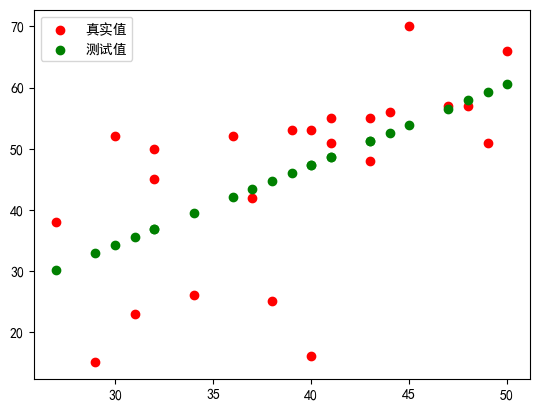

In [19]:
from sklearn.metrics import mean_squared_error

# 4、建模效果可视化展示（5分）
y_pred=lr.predict(X_test)
mean_squared_error(y_test,y_pred)
plt.scatter(X_test,y_test,color='red',label='真实值')
plt.scatter(X_test,y_pred,color='green',label='测试值')
plt.legend()
plt.show()

In [25]:
# 将数字标签转换为文字标签
# 5、使用模型对样本分群，对样本每条数据打上分群后的标签（如 高净值、低净值）（5分）
kmeans = KMeans(n_clusters=2, random_state=0).fit(X_train,y_train)
a1['分'] = kmeans.predict(a1[['年龄(岁)']])
# 获取簇的标签
# labels = kmeans.labels_
# 使用列表推导式将数字标签转换为文字标签
a1['分类'] = ['低净值' if i == 0 else '高净值' for i in a1['分']]

print(a1.head())

   年龄(岁)  收入(万元)  分   分类
0     50      66  0  低净值
1     44      51  0  低净值
2     30      56  1  高净值
3     46      50  0  低净值
4     32      50  1  高净值


D:\Jupyter\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
